In [47]:
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import random 

#### E1이 켜질 확률 0부터 1까지 랜덤하게 반복, 1000개의 timestep에 대해서 E1의 state 0과 1이 random하게 분포한 array 제작 

In [120]:
# probability that E1 turns on 
q = round(random.uniform(0, 1),2)
print(q)

time = np.linspace(0,1000,1001)
print(time)
for time in np.linspace(0,1000,1001):

    zeros = np.zeros(int(1000*(1-q))) # Among 1000, 900 will be 0, E1 doesn't turn on 
    ones = np.ones(int(round(1000*q))) # Among 1000, 100 will be 1, E1 turns on with q probability
    E1_state = np.append(zeros, ones)
    random.shuffle(E1_state)   
print(E1_state.shape)

0.12
[   0.    1.    2. ...  998.  999. 1000.]
(1000,)


In [121]:
#g = nx.Graph()
#edges = [('E1', 'N1'),('N1', 'N2'),('N1', 'N3'),('N1', 'N4'),('N2', 'N3'),('N3', 'N1'),('N3','N4'),('N4','N2')]
#g.add_edges_from(edges)
#graph={}
# N1, N2, N3, N4가 logic에 따라, 매 타임포인트마다 synchronous update이 되어야 함
##def update(N1, N2, N3, N4): # 각 time 마다의 N1, N2,N3,N4의 state가 있어야 하는데 ex t=1 [N1,N2,N3,N4] state로 되어야 할 것 같음
    #def N1(t+1): E1(t) and not N3(t) # N1(E1,N3)
    #def N2(t+1): N1(t) and not N4(t) # N2(N1,N4)
    #def N3(t+1): N1(t) and not N2(t) # N3(N1,N2)
    #def N4(t+1): N1(t) and not N3(t) # N4(N1,N3)

    # Array = [E1, N1, N2, N3, N4]
    # Array = [0,  1,  2,  3,  4]

def update(previous, i):
    current = np.zeros(5)
    current[0] = E1_state[i]
    current[1] = previous[0]*abs(1-previous[3])    # N1[i] = (E1_state(i-1))*N_3(i-1)
    current[2] = previous[1]*abs(1-previous[4]) 
    current[3] = previous[1]*abs(1-previous[2])  
    current[4] = previous[1]*abs(1-previous[3])  
    return current             

previous = np.array([E1_state[0],0,0,0,0])
count = np.zeros(5)
    
for i in range(1000):
    current = update(previous, i)
    previous = current 
    
    if i >= 700:
        count += current

In [122]:
print(count)

[39. 36. 33. 33. 33.]


<function matplotlib.pyplot.show(*args, **kw)>

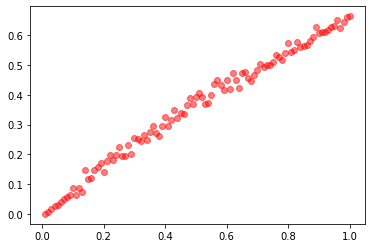

In [123]:
#rows, cols = (100, 5) 
#count = [[0 for i in range(cols)] for j in range(rows)]

count_list = np.zeros((100,5))
#print(count_list)

for i in range(1,100):
    q = 0.01*i
    zeros = np.zeros(int(round(1000*(1-q)))) # Among 1000, 900 will be 0, E1 doesn't turn on 
    ones = np.ones(int(round(1000*q))) # Among 1000, 100 will be 1, E1 turns on with q probability
    E1_state = np.append(zeros, ones)
    random.shuffle(E1_state)
    
    def update(previous, i):
        current = np.zeros(5)
        current[0] = E1_state[i]
        current[1] = previous[0]*abs(1-previous[3])    # N1[i] = (E1_state(i-1))*N_3(i-1)
        current[2] = previous[1]*abs(1-previous[4]) 
        current[3] = previous[1]*abs(1-previous[2])  
        current[4] = previous[1]*abs(1-previous[3])  
        return current             

    previous = np.array([E1_state[0],0,0,0,0])
    count = np.zeros(5)
    
    for j in range(1000):
        current = update(previous, j)
        previous = current 

        if j >= 700:
            count += current
            
    count_list[i] = count
    
probability = count_list/300

plt.plot(np.linspace(0.01, 1, 100),probability[:,1],'bo', color= 'red', alpha=0.5)
plt.show
#plt.plot(*average_values(times,samples),color='r')
#plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

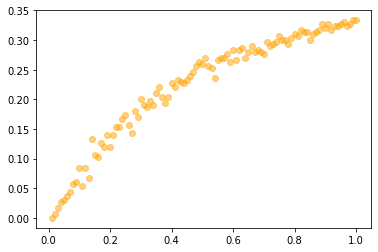

In [124]:
plt.plot(np.linspace(0.01, 1, 100),probability[:,2],'bo', color = 'orange',alpha=0.5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

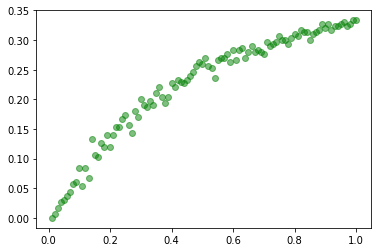

In [125]:
plt.plot(np.linspace(0.01, 1, 100),probability[:,3],'bo', color = 'green',alpha=0.5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

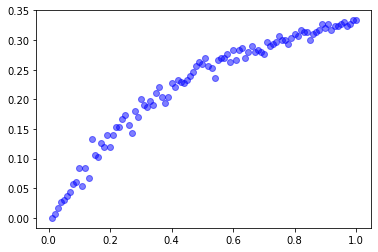

In [126]:
plt.plot(np.linspace(0.01, 1, 100),probability[:,3],'bo', color = 'blue',alpha=0.5)
plt.show

In [106]:
print(probability)   

[[0.         0.         0.         0.         0.        ]
 [0.01       0.01       0.01       0.01       0.01      ]
 [0.02       0.02       0.02       0.02       0.02      ]
 [0.03       0.03       0.03       0.03       0.03      ]
 [0.04333333 0.04333333 0.04333333 0.04333333 0.04333333]
 [0.05666667 0.05333333 0.05333333 0.05333333 0.05333333]
 [0.05666667 0.04333333 0.04333333 0.04333333 0.04333333]
 [0.05       0.05       0.05       0.05       0.05      ]
 [0.10333333 0.1        0.08666667 0.08666667 0.08666667]
 [0.07       0.06666667 0.06333333 0.06333333 0.06333333]
 [0.08333333 0.08333333 0.08       0.08       0.08      ]
 [0.11333333 0.10333333 0.09666667 0.09666667 0.09666667]
 [0.13       0.11666667 0.10333333 0.10333333 0.10333333]
 [0.10333333 0.09666667 0.08666667 0.08666667 0.08666667]
 [0.15       0.13333333 0.11333333 0.11333333 0.11333333]
 [0.16666667 0.14333333 0.11666667 0.11666667 0.11666667]
 [0.17666667 0.16333333 0.13666667 0.13666667 0.13666667]
 [0.19666667 0

In [41]:
def sleep_in(weekday, vacation):
    # delete the following pass statement and fill in your code below
    pass
  
# Provided simple test() function used in main() to print
# what each function returns vs. what it's supposed to return.
def test(got, expected):
  if got == expected:
    prefix = ' OK '
  else:
    prefix = '  X '
  print '%s got: %s expected: %s' % (prefix, repr(got), repr(expected))


# Provided main() calls the above functions with interesting inputs,
# using test() to check if each result is correct or not.
def main():
  print 'sleep_in'
  # We only sleep in if it is not a weekday or we are on vacation.
  test(sleep_in(False, False), True)
  test(sleep_in(True, False), False)
  test(sleep_in(False, True), True)
  test(sleep_in(True, True), True)

SyntaxError: invalid syntax (<ipython-input-41-9a7dc7331018>, line 12)

In [28]:
for time in np.linspace(0,10,101):

    #and a random number of samples at each timestep:
    num_samples = np.random.random_integers(1,10)

    for i in range(0,num_samples):
        times.append(time)
        samples.append(np.sin(time)+np.random.random()*0.5)

times   = np.array(times)
samples = np.array(samples)

plt.plot(times,samples,'bo',ms=3,mec=None,alpha=0.5)
plt.plot(*average_values(times,samples),color='r')
plt.show()

C:\Users\sbie\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  after removing the cwd from sys.path.


NameError: name 'times' is not defined